# Nick Psaris - Q tips

In [1]:
/
initalise with large console size
\
\c 300 200

## Box-Muller
Converts 2 uniform random variates into 2 normal random variables - accurate but requires 2 uniform random hence high computation

- Convert two uniform random variables into polar coordinates of a normally distributed variables
- Transform back into rectangular coordinates

In [2]:
.stat.bm:{
    if[count[x] mod 2;'`length];
    x:2 0N#x; /reshape list into columns with 2 rows, used to create matrix when N x M is passed in
    r:sqrt -2f*log x 0;
    theta:2f*acos[-1]*x 1;
    x: r*cos theta;
    x,:r*sin theta;
    x
 }
/
To utilise this, throw in even numbers
Care that its acos[-1].
This algo is popular with speed
Have to check the math behind this normally distributed random number generator
This assumes that the prior numbers were uniformly distributed
\
.stat.bm[2?1f]

-1.359294 -0.1465337


## Central Region & Horner's Method

- cnorminv: polynomial coefficients a and b and uses horners to compute two polynomial approximations
- horner: list of polynomial and initial value, iterative addition same as **sv**


In [3]:
.stat.cnorminv:{
    a:-25.44106049367 41.39119773534 -18.61500062529 2.50662823884;
    b:3.13082909833 -21.06224101826 23.08336743743 -8.47351093090 1;
    x*:horner[a;s]%horner[b] s:x*x-:.5;
    x}
.stat.horner:{{z+y*x}[y]/[x]}

/
loading in some stats function, would be better to just download the q script
\

## Using Over/Scan in Exponentially weighted moving average
- X:Decay Factor
- Y:List of observations

Interpretation of the scan function here:
The function simplifies into the follow if x is 0.1
{{(x*1-0.1)+y*0.1}\[x]}
if x is [0 2 3]
The first iteration does not evaluates since y will missing
so the result will be the first value in the list
This result is passed back into x and y will take on the next value in the list
hence 0*0.9+2*0.1

In [4]:
ewma:{{(y*1-x)+z*x}[x]\[y]}

ewma[.25;til 10]

0
0.25
0.6875
1.265625
1.949219
2.711914
3.533936
4.400452
5.300339
6.225254


## Environmental Variables 
It is useful to use inbuilt q function to obtain envVar from symbols
- getenv to obtain envVar
- setenv to set new envVar or overwrite

In [5]:
getenv`QHOME

"C:\\q"


## Geometric Brownian Motion
The gbm function introduced here uses 4 parameter
- s:stock volatility (sigma)
- r:rate of drift 
- t:interval time step
- z:normal random realization

This function transform list of normal random variables into list of returns scaled to the specific time interval, volatility and drift

In [6]:
.stat.gbm:{[s;r;t;z] exp(t*r-.5*s*s)+z*s*sqrt t}

`securityPrice`randChanges!(100*prds x;x:.stat.gbm[.30;.05;1%252] .stat.bm 252?1f)

/
Note that this produces a path with 252 daily steps for a stock with an annual volatiltiy of 30% growing at 5% a year
\

securityPrice| 98.12996  98.04308  95.03049  97.3351  96.1348   97.45416 98.88362 101.4068 103.1771 104.7877 100.9684  101.3488 103.3833 101.6246  103.5563 102.0794  99.73724  100.2673 101.0993 101..
randChanges  | 0.9812996 0.9991147 0.9692727 1.024251 0.9876683 1.013724 1.014668 1.025517 1.017457 1.01561  0.9635518 1.003768 1.020074 0.9829884 1.019009 0.9857383 0.9770553 1.005315 1.008297 1.0..


## Uniform Functions

scan functions hence produces a list of intermediate results
mainly ends with *s* at the back of the function
- **avgs**: each Element is the avg of all prior elements
- **deltas**: each Element if the difference between itself and the prior value
- **fills**: each Element is filled with the prior value if null
- **maxs**: each Element is the maximum value of all prior elements
- **mins**: each Element is the minimum value of all prior elements
- **prds**: each Element is the product of all prior elements
- **ratios**: each Element is the ratio of itself and the prior value
- **sums**: each Element is the summation of all prior elements

In [7]:
/
Recall that using uniform functions
it will interact will all prior elements
This can cause an issue if u do not want minus 0 as the first element
Hence we can pass in x and y into the function
\
deltas[1;1+til 5]

deltas[1+til 5]

0 1 1 1 1


1 1 1 1 1


## Dictionary
We usually use x!y where x and y are equal length list to create a dictionary 
But if we have pair wise list we can also make a dictionary by manipulating **!** from infix dyadic with the dot operater
This converts it into a noun through parentheses

In [8]:
0N!pairs:(2001.01.01+til 100;100?1000f)

(!) . pairs

(2001.01.01 2001.01.02 2001.01.03 2001.01.04 2001.01.05 2001.01.06 2001.01.07 2001.01.08 2001.01.09 2001.01.10 2001.01.11 2001.01.12 2001.01.13 2001.01.14 2001.01.15 2001.01.16 2001.01.17 2001.01.1..


2001.01.01 2001.01.02 2001.01.03 2001.01.04 2001.01.05 2001.01.06 2001.01.07 2001.01.08 2001.01.09 2001.01.10 2001.01.11 2001.01.12 2001.01.13 2001.01.14 2001.01.15 2001.01.16 2001.01.17 2001.01.18..
955.0901   615.8515   702.455    355.0381   361.5143   908.9531   206.2569   481.821    206.5625   522.9178   333.8806   414.621    972.5813   542.2726   611.6582   341.4991   951.6746   116.9475  ..


2001.01.01| 955.0901
2001.01.02| 615.8515
2001.01.03| 702.455
2001.01.04| 355.0381
2001.01.05| 361.5143
2001.01.06| 908.9531
2001.01.07| 206.2569
2001.01.08| 481.821
2001.01.09| 206.5625
2001.01.10| 522.9178
2001.01.11| 333.8806
2001.01.12| 414.621
2001.01.13| 972.5813
2001.01.14| 542.2726
2001.01.15| 611.6582
2001.01.16| 341.4991
2001.01.17| 951.6746
2001.01.18| 116.9475
2001.01.19| 815.8957
2001.01.20| 609.1539
2001.01.21| 983.0794
2001.01.22| 754.3122
2001.01.23| 381.3679
2001.01.24| 31.12646
2001.01.25| 419.4691
2001.01.26| 186.2869
2001.01.27| 795.9531
2001.01.28| 366.7275
2001.01.29| 516.5234
2001.01.30| 65.41696
2001.01.31| 597.383
2001.02.01| 636.9711
2001.02.02| 218.0873
2001.02.03| 507.5745
2001.02.04| 417.6994
2001.02.05| 19.20741
2001.02.06| 876.1714
2001.02.07| 757.5856
2001.02.08| 603.0223
2001.02.09| 181.1364
2001.02.10| 232.9662
2001.02.11| 250.046
2001.02.12| 73.7272
2001.02.13| 318.6642
2001.02.14| 187.2634
2001.02.15| 841.6288
2001.02.16| 725.0709
2001.02.17| 481.804

## Generating Big Data Set (Simulation)
The utilisation of GBM allows for monte carlo simulation
<br> Using the stat function introduced above, we will create 1000 simulated paths of 364 steps

In [9]:
sim:([] [id:`u#til 1000];simulatedPath:100*.stat.gbm[.30;.05;1%364] .stat.bm each 1000 0N#(1000*364)?1f)
5#sim
/
With the simulated path table, by indexing into each id we can obtain its random (normally distributed returns) path
Inspections shows the randomness of the paths
\
sim[3?1000]

id simulatedPath                                                                                                                                                                                     ..
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------..
0  98.75482 100.1158 100.1294 100.4128 100.6513 101.8903 100.9388 103.941  99.88314 99.84064 97.9187  97.59032 101.0103 99.63616 99.68635 100.4159 99.59019 99.76416 98.73448 101.3292 97.79205 99.72..
1  98.85605 97.86719 97.9511  98.15608 100.7072 98.24634 99.21388 102.1344 101.8378 97.40092 98.67161 99.19696 100.9857 98.17369 99.87219 98.85317 100.8452 100.1226 98.5374  99.69734 96.10748 100.3..
2  99.13311 98.75526 101.1344 103.5733 98.52801 99.35453 98.11154 100.9107 100.8478 100.338  100.2265 99.2773  98.27786 100.1163 98.1185  99.74472 98.32871 97.41662 100.704  98.77166 98.79896 99.92..


id  simulatedPath                                                                                                                                                                                    ..
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------..
879 97.63119 99.68746 99.74548 103.797  100.3285 101.1409 100.6397 100.2887 98.91315 100.1925 102.742  99.56649 102.363  100.2339 97.66072 101.4435 101.5434 100.4047 99.97368 102.2011 96.85441 96.7..
488 103.6471 103.3592 101.3918 100.0954 100.6337 102.2552 102.0478 97.43418 98.72005 99.98064 98.76345 100.1835 99.85744 101.626  101.24   100.5462 99.62043 101.2769 101.1711 99.68234 97.92298 99.2..
694 100.162  99.09764 102.6879 102.0359 102.6055 98.18979 100.4711 100.4208 99.99886 99.54387 97.56569 99.75428 101.0225 102.0659 98.7836  100.2915 99.69741 99.46039 100.5683 102.0202 95.42576 101...


This table is now the distribution of a monte carlo simulation of the price paths
Hence we can obtain more information from the distribution summary and graphical inspection of the path which should show the normal distribution of the paths.

In [10]:
flip select maximumPrice:max simulatedPath, minimumPrice:min simulatedPath,svPct:{(asc x) floor .75 * count x} each simulatedPath from sim

maximumPrice| 104.8739 105.7584 105.2852 105.8741 105.6634 105.2721 105.0881 105.1686 104.7318 104.7084 104.8415 105.1801 105.365 105.9546 104.6916 105.1107 105.1567 105.5568 105.3491 104.3825 105...
minimumPrice| 95.26323 94.28736 95.33541 95.28722 94.62459 94.74116 95.50013 95.27105 94.54047 95.18944 95.46713 93.30627 95.75059 94.34254 95.27742 95.55251 95.01831 94.41785 94.523 95.75953 93.98..
svPct       | 101.1364 100.9219 101.0707 101.0203 100.897 101.1519 101.1313 100.9169 100.8392 101.0647 101.0711 100.9865 101.2145 100.9475 101.0442 100.9752 101.008 100.9789 101.1383 101.105 101.01..


In [11]:
\l importmatplotlib.q

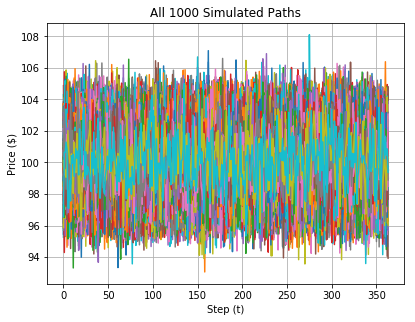

In [12]:
simulatedPathPlt:.matplotlib.pyplot[]

paths:sim[`simulatedPath]
simulatedPathPlt.plot each paths;
simulatedPathPlt.xlabel"Step (t)";
simulatedPathPlt.ylabel"Price ($)";
simulatedPathPlt.title"All 1000 Simulated Paths";
simulatedPathPlt.grid 1b;
simulatedPathPlt.show[];

## Paraenteses @
Parentheses with @ is able to force a function composition expecting a single argument, this allows us to bypass multiple each

In [14]:
(asc ?[;til 100]@) each 5#20

0 8  19 22 31 40 48 50 51 54 62 68 75 76 78 88 89 92 93 98
3 4  14 15 20 21 28 35 40 50 52 53 73 78 78 83 88 91 91 92
3 8  16 17 25 29 45 47 48 48 66 73 80 81 83 86 90 93 93 94
0 8  15 15 20 26 33 33 35 35 37 39 42 55 61 66 68 72 85 96
3 12 13 14 14 23 25 29 38 43 50 56 57 59 63 85 88 90 96 98


## Sorting for step function
Normally used for tick size movement for different stock price, this uses the sorted attribute to step down
Internally, this uses the bin function to find a number instead of ?

In [32]:
tickDict:`s#(2 10 50 100)!(0.2 0.5 0.75 1)
tickDict 4 55 65 20 11 4 99
/this provides the index

(asc[1 9 72 5 6]) bin 10 

.sim.tickrnd:{if[99h=type x;x@:y];(y;x+y:x*floor y%x)}

ts:`s#0n 5 50 100!.001 .005 .01 .02

x:ts
0N!x
/

This is not working, need to check the workings of x@:y
\

0.2 0.75 0.75 0.5 0.5 0.2 0.75


`s#`s#0n 5 50 100!0.001 0.005 0.01 0.02


3


   | 0.001
5  | 0.005
50 | 0.01
100| 0.02


## Joining columns to a table
Since tables are flipped dictionary, given the same amount of rows, we can add the columns to the side of the table easily

In [37]:
table:([]sym:100?`3;price:100?10000)
10#table
10#table,' flip `place`close!(100?"abc";100?100)

sym price
---------
gca 8999 
fnj 6528 
ppe 9423 
ffi 5741 
iop 6700 
mij 3452 
ekf 6828 
hab 6600 
eoa 3792 
eee 6605 


sym price place close
---------------------
gca 8999  b     0    
fnj 6528  b     32   
ppe 9423  c     25   
ffi 5741  c     73   
iop 6700  c     52   
mij 3452  a     70   
ekf 6828  b     43   
hab 6600  b     33   
eoa 3792  b     82   
eee 6605  a     96   


## Time internal function
In kdbq, we have gtime and ltime
- gtime allows us to convert from local to gmt 
- ltime allows us to convert from gmt to local

In [5]:
gtime .z.p
ltime .z.P

2018.05.10D05:16:10.561077000


2018.05.11D05:16:10.562078000


## Flexible Return Values

When writing functions, it is best to pass the table as an argument and return the modified result.
<br> This allows the function to be used to modify global tables (when table name is passed) and local tables (when actual table is passed)
<br> There is an advantage of efficiency for global tables

In [10]:
10#t:([] price:100?100)
{update price:2*price from x} [t] /local table
{update price:2*price from x} [`t] /global table
10#t
/
note that function works with both version of t, one as a local table and one as a global table.
\

price
-----
70   
16   
61   
32   
71   
91   
74   
39   
97   
48   


price
-----
140  
32   
122  
64   
142  
182  
148  
78   
194  
96   
92   
84   
116  
198  
142  
104  
158  
66   
86   
38   
..


`t


price
-----
140  
32   
122  
64   
142  
182  
148  
78   
194  
96   


## Table Drop
using a neat trick of the dot . operator, we can create a function that drops base on index for table

In [13]:
.q.drop:.[;();_;]
show tbl:([]10?10)
.q.drop[tbl;0] /first guy was dropped

x
-
5
6
8
1
1
6
4
9
1
1


x
-
6
8
1
1
6
4
9
1
1


## Merge of dictionaries
When there are two dictionaries, x having all the keys while y having some keys.
<br> Using .Q.def[x] y will left join/merge the values in y onto x
<br> This works well with command line values since everything comes in as a string. 
<br> function only merges if string

In [23]:
x:`time`price`type`history!(.z.p;100;`abc;`none)
y:`type`history!("bbc";"singapore")

show x
0N!""
show y
0N!""
p:.Q.def[x] y

show p

time   | 2018.05.10D13:54:56.637259000
price  | 100
type   | `abc
history| `none
""


""


type   | "bbc"
history| "singapore"
""
time   | 2018.05.10D13:54:56.637259000
price  | 100
type   | `bbc
history| `singapore


""


## Justify Text
We can justify text to match and look better with $

In [33]:
-20$"hi"

"                  hi"


In [37]:
(1 2 3),(::)

1
2
3
::


## Fixing Q table column names
q-sql is a powerful tool but if the column names clashes with specification required, it cant be ran
we use .Q.id to fix this

In [39]:
.Q.id enlist (`$"pct%";`div)!"ff"$\:()

.utils.mapcal:{[d;t](c^d c:cols t) xcol t}
/
This allows us to rename cols in any position
\


pct div1
--------
        


## Table can be promoted from dictionaries (key tables are dictionaries)
The beauty of exec is that when it is used right, it can simplify select statement that utilises function 

In [11]:
t:([] id:til 100;time:100?.z.p;p:100?100)
10#select o:first p,h:max p,l:min p,c:last p by id,`week$time from t
.stat.ohlc:{`o`h`l`c!(first;max;min;last)@\:x}
10#exec .stat.ohlc p by id,time.week from t /same result but cleaner
/
hence we use exec by as a quick way to simplify intermediate steps
\
.stat.summary:{`n`mn`mx`md`dv!(count;min;max;med;sdev)@\:x}
exec .stat.summary p by id,`week$time from t

id time      | o  h  l  c 
-------------| -----------
0  2016.06.13| 40 40 40 40
1  2005.03.21| 66 66 66 66
2  2002.01.28| 99 99 99 99
3  2009.12.14| 25 25 25 25
4  2008.12.01| 95 95 95 95
5  2003.01.06| 83 83 83 83
6  2018.02.19| 31 31 31 31
7  2000.04.17| 84 84 84 84
8  2008.10.20| 28 28 28 28
9  2015.06.22| 18 18 18 18


id week      | o  h  l  c 
-------------| -----------
0  2016.06.13| 40 40 40 40
1  2005.03.21| 66 66 66 66
2  2002.01.28| 99 99 99 99
3  2009.12.14| 25 25 25 25
4  2008.12.01| 95 95 95 95
5  2003.01.06| 83 83 83 83
6  2018.02.19| 31 31 31 31
7  2000.04.17| 84 84 84 84
8  2008.10.20| 28 28 28 28
9  2015.06.22| 18 18 18 18


id time      | n mn mx md dv
-------------| -------------
0  2016.06.13| 1 40 40 40   
1  2005.03.21| 1 66 66 66   
2  2002.01.28| 1 99 99 99   
3  2009.12.14| 1 25 25 25   
4  2008.12.01| 1 95 95 95   
5  2003.01.06| 1 83 83 83   
6  2018.02.19| 1 31 31 31   
7  2000.04.17| 1 84 84 84   
8  2008.10.20| 1 28 28 28   
9  2015.06.22| 1 18 18 18   
10 2007.11.12| 1 98 98 98   
11 2009.12.07| 1 89 89 89   
12 2006.07.10| 1 65 65 65   
13 2013.11.25| 1 57 57 57   
14 2002.11.04| 1 64 64 64   
15 2016.09.19| 1 57 57 57   
16 2009.08.24| 1 66 66 66   
17 2009.03.02| 1 78 78 78   
18 2015.02.02| 1 90 90 90   
19 2002.06.10| 1 46 46 46   
..


## Pivoting Tables
We are used to looking at pivot tables as they are easier to understand. Hence there are a couple of ways to convert tab;es nto pivots

In [13]:
/utilises parse to create the pivot
.utils.pivots:{[c;g;d;t]
    s:"exec (`$exec string asc distinct ",string[c]," from t)";
    s,:"#(`string ",string[c],")!",string d;
    s,:" by ", "," sv ":" sv' string flip 2#enlist g,();
    s,:" from t";
    p:eval @ [parse s;1;:;t];
    p}
/utilises the functional form from prase to create pivot
.utils.pivotp:{[c;g;d;t]
    u:`$string asc distinct t c;
    pf:{x#(`$string y)!z};
    p:?[t;();g!g,:();(pf;`u;c;d)];
    p}
/manually create pivot from q structur
.utils.pivotq:{[c;g;d;t]
    u:`$string asc distinct t c;
    p:asc[key p]#p:group (g,())#t;
    p:u#/:(`$string t c)[p]!'t[d] p;
    p}

## Timing Function (utility function)
we are able to dynamically amend existing user declared functions to monitor the run time of the functions

In [66]:
/Initialise table
.prof.events:flip `id`pid`func`time!"jjsn"$\:()
.prof.pid:.prof.id:0
.prof.events

id pid func time
----------------


In [67]:
.prof.time:{[n;f;a]
    s:.z.p;
    id:.prof.id+:1;
    pid:.prof.pid;
    .prof.pid:id;
    r:f . a;
    .prof.pid:pid;
    `.prof.events upsert (id;pid;n;.z.p-s);
    r}
/from this timing function we have to put it into our self declared functions
.prof.instr:{[n]
    m:get f:get n;
    system "d .",string first m 3;
    n set (')[.prof.time[n;f];enlist];
    system "d .";
    n}

In [68]:
.test.difficult:{x*x}
.test.difficult
.prof.instr[`.test.difficult]
.test.difficult

{x*x}


`.test.difficult


{[n;f;a]
    s:.z.p;
    id:.prof.id+:1;
    pid:.prof.pid;
    .prof.pid:id;
    r:f . a;
    .prof.pid:pid;
    `.prof.events upsert (id;pid;n;.z.p-s);
    r}[`.test.difficult;{x*x}]enlist


In [69]:
.test.difficult[2]
.prof.events

4


id pid func            time                
-------------------------------------------
1  0   .test.difficult 0D00:00:00.000000000


## Newton-Raphson with while loop
This is a format of NR algo with the scan function - scan iterate while
- e: error tolerance
- f: function with it's derivatives
- x: inital guess

In [9]:
.stat.nr:{[e;f;x] $[e>abs d:first [r]%last r: f x;x;x-d]}
f:{(-2+x*x;2*x)}
.stat.nr[0f;f]\[1f]

1 1.5 1.416667 1.414216 1.414214 1.414214


## Inverting a function
Inverting a function is for us to find its roots
- rf: root-finding algo
- f: function with f(x) and f'(x)
- y: y value to be inverted
- x: inital guess

In [24]:
.stat.invert:{[rf;f;y;x] rf[(neg y;0f)+f@]x}
.stat.invert[.stat.nr[0f];{(x*x;2*x)};2]\[1f]
/
This inversion method is very useful for inverting the Black-Scholes-Merton formula
This helps in calculation of the implied volatility of a specific option price.
\

1 1.5 1.416667 1.414216 1.414214 1.414214


## BSM Model Inversion
...To be developed...